# CS275P Final Project: Intrusion Detection System Analysis and Prediction

#### Connor McManigal, Aaron Mui, Rishabh Verma, and Peyton Politewicz

## Imports and Data Preprocessing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

In [3]:
rt_iot2022 = fetch_ucirepo(id=942) 
x = rt_iot2022.data.features 
y = rt_iot2022.data.targets 

print("Data Shape with Aggregates\n")
print("Rows:", x.shape[0])
print("Features:", x.shape[1])

Data Shape with Aggregates

Rows: 123117
Features: 83


In [4]:
X = x.filter(regex='^((?!max|min|avg|std).)*$')

print("Data Shape without Aggregates\n")
print("Rows:", X.shape[0])
print("Features:", X.shape[1])
X.head()

Data Shape without Aggregates

Rows: 123117
Features: 47


,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,bwd_bulk_bytes,fwd_bulk_packets,bwd_bulk_packets,fwd_bulk_rate,bwd_bulk_rate,active.tot,idle.tot,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,0.0,0.0,0.0,0.0,2282414.913,29729182.96,64240,26847,502
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,0.0,0.0,0.0,0.0,2028306.961,29855277.06,64240,26847,502
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,0.0,0.0,0.0,0.0,2281903.982,29842149.02,64240,26847,502
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,0.0,0.0,0.0,0.0,2047288.179,29913774.97,64240,26847,502
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,0.0,0.0,0.0,0.0,2087656.975,29814704.90,64240,26847,502


## Exploratory Data Analysis

In [5]:
# get counts of targets
y.value_counts()

Attack_type               
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

/var/folders/h6/jflqd9l57glcp8j75_d60stm0000gn/T/ipykernel_80357/1559396025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = y, x = y['Attack_type'], order = y['Attack_type'].value_counts().index, palette = 'CMRmap')


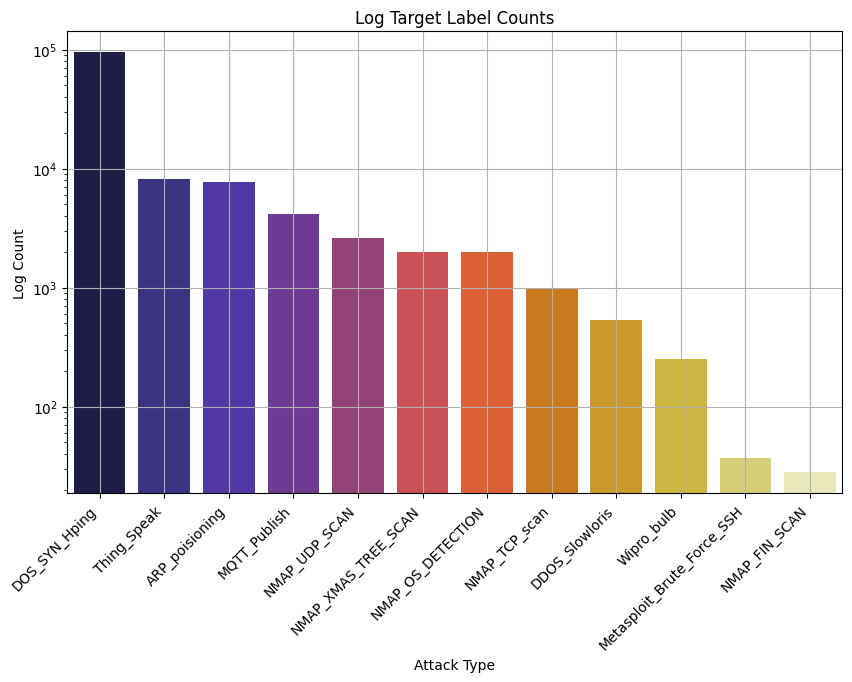

In [111]:
plt.figure(figsize = (10,6))
sns.countplot(data = y, x = y['Attack_type'], order = y['Attack_type'].value_counts().index, palette = 'CMRmap')
plt.yscale('log')
plt.ylabel('Log Count')
plt.xlabel('Attack Type')
plt.title('Log Target Label Counts')
plt.xticks(rotation = 45, ha = 'right')
plt.grid()
plt.show()

In [7]:
# get counts of protocols
X['proto'].value_counts()

proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64

In [8]:
# get counts of network services
X['service'].value_counts()

service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64

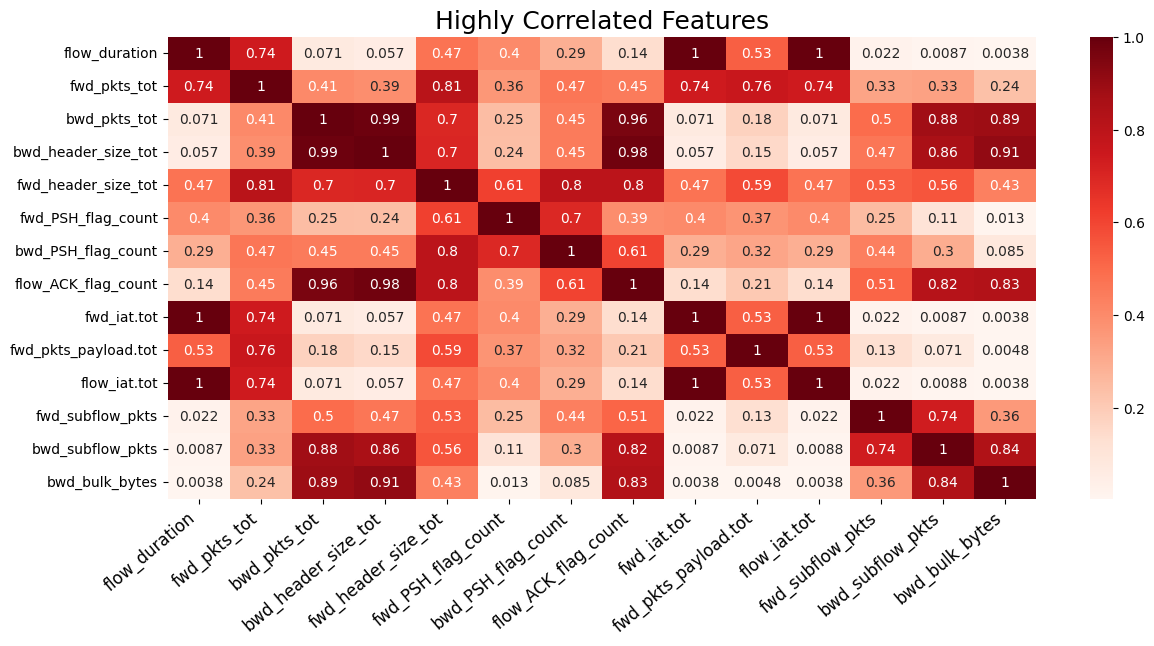

In [9]:
X_filter = X[['flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'bwd_header_size_tot', 'fwd_header_size_tot', 'fwd_PSH_flag_count', 
                'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_iat.tot', 'fwd_pkts_payload.tot', 'flow_iat.tot', 'fwd_subflow_pkts', 
                'bwd_subflow_pkts', 'bwd_bulk_bytes']]
X_corr = X_filter.corr()

plt.figure(figsize=(14,6))
sns.heatmap(X_corr, annot = True, cmap = 'Reds')
plt.title("Highly Correlated Features", fontsize = 18)
plt.xticks(rotation = 40, ha = 'right', fontsize = 12)
plt.show()

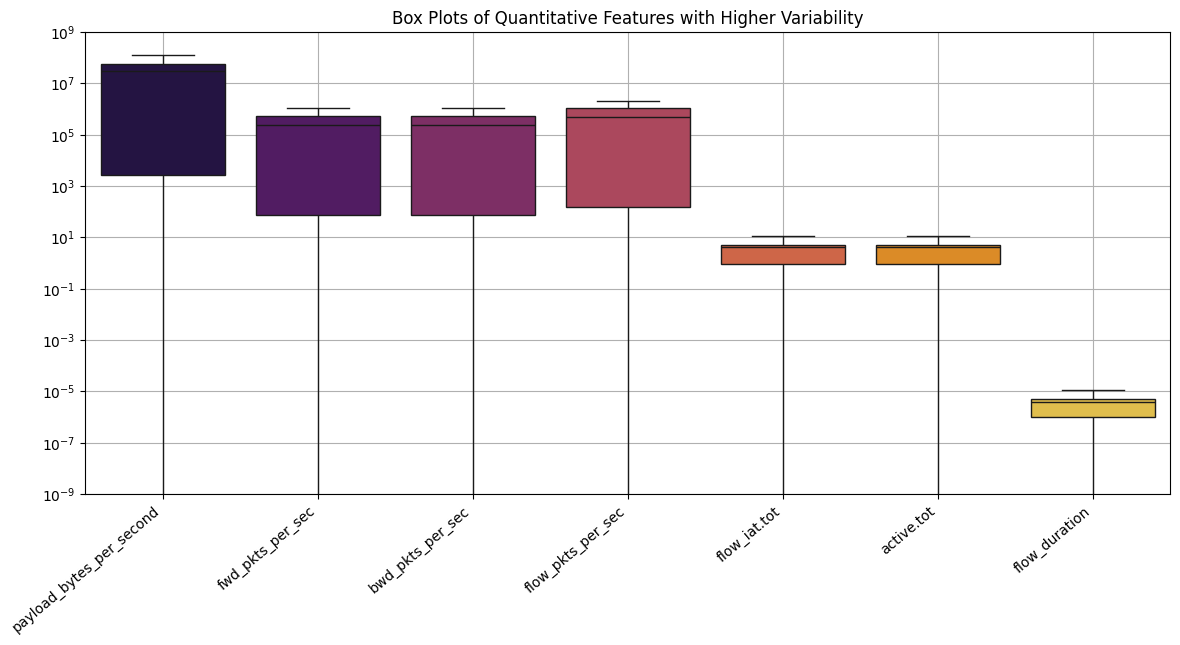

In [116]:
# visualize box plots of higher variability features
X_higher_variability = X[['payload_bytes_per_second', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'flow_iat.tot', 'active.tot', 'flow_duration']]

plt.figure(figsize = (14,6))
sns.boxplot(data = X_higher_variability, showfliers = False, palette = 'inferno')
plt.yscale('log')
plt.ylim(10**-9, 10**9)
plt.xticks(rotation = 40, ha = 'right')
plt.title('Box Plots of Quantitative Features with Higher Variability')
plt.grid()
plt.show()

/var/folders/h6/jflqd9l57glcp8j75_d60stm0000gn/T/ipykernel_80357/1361684578.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(normal_types, rotation = 45, ha = 'right')
/var/folders/h6/jflqd9l57glcp8j75_d60stm0000gn/T/ipykernel_80357/1361684578.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(normal_types, rotation = 45, ha = 'right')


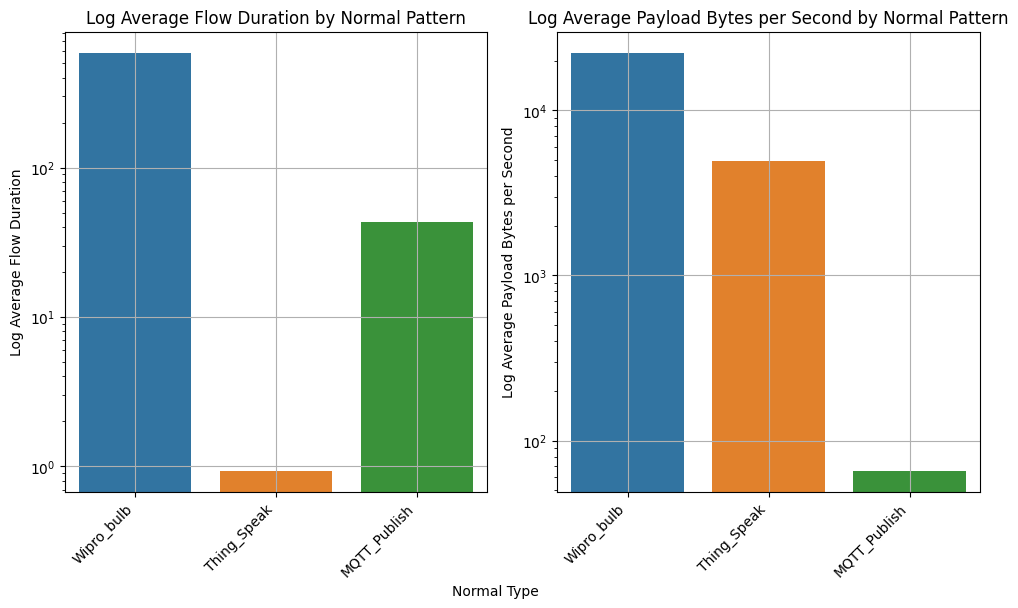

In [114]:
# average flow duration and payload for normal patterns
full_data = pd.concat([X,y], axis = 1)

normal_types = [
    'Wipro_bulb',
    'Thing_Speak',
    'MQTT_Publish'
]

fig, axes = plt.subplots(1,2, figsize = (10,6))

for _, normal in enumerate(normal_types):
    normal_patterns = full_data[full_data['Attack_type'] == normal]
    avg_flow_duration = normal_patterns['flow_duration'].mean()
    sns.barplot(x = [normal], y = [avg_flow_duration], ax = axes[0])

axes[0].set_title('Log Average Flow Duration by Normal Pattern')
axes[0].set_ylabel('Log Average Flow Duration')
axes[0].set_yscale('log')
axes[0].grid()
axes[0].set_xticklabels(normal_types, rotation = 45, ha = 'right')


for _, normal in enumerate(normal_types):
    normal_patterns = full_data[full_data['Attack_type'] == normal]
    avg_payload = normal_patterns['payload_bytes_per_second'].mean()
    sns.barplot(x = [normal], y = [avg_payload], ax = axes[1])

axes[1].set_title('Log Average Payload Bytes per Second by Normal Pattern')
axes[1].set_ylabel('Log Average Payload Bytes per Second')
axes[1].set_yscale('log')
axes[1].grid()
axes[1].set_xticklabels(normal_types, rotation = 45, ha = 'right')

fig.text(0.5, -0.001, 'Normal Type', ha = 'center')
plt.tight_layout()
plt.show()

/var/folders/h6/jflqd9l57glcp8j75_d60stm0000gn/T/ipykernel_80357/3041183017.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(attack_types, rotation = 45, ha = 'right')
/var/folders/h6/jflqd9l57glcp8j75_d60stm0000gn/T/ipykernel_80357/3041183017.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(attack_types, rotation = 45, ha = 'right')


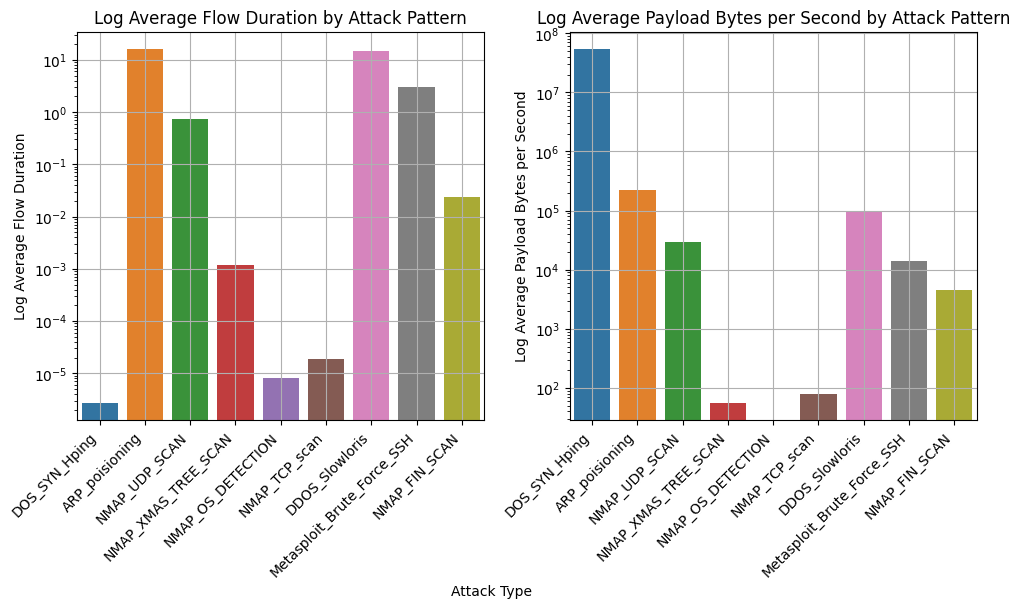

In [115]:
# average flow duration and payload for attack patterns

attack_types = [
    'DOS_SYN_Hping',
    'ARP_poisioning',
    'NMAP_UDP_SCAN',
    'NMAP_XMAS_TREE_SCAN',
    'NMAP_OS_DETECTION',
    'NMAP_TCP_scan',
    'DDOS_Slowloris',
    'Metasploit_Brute_Force_SSH',
    'NMAP_FIN_SCAN'
]

fig, axes = plt.subplots(1,2, figsize = (10,6))

for _, attack in enumerate(attack_types):
    attack_patterns = full_data[full_data['Attack_type'] == attack]
    avg_flow_duration = attack_patterns['flow_duration'].mean()
    sns.barplot(x = [attack], y = [avg_flow_duration], ax = axes[0])

axes[0].set_title('Log Average Flow Duration by Attack Pattern')
axes[0].set_ylabel('Log Average Flow Duration')
axes[0].set_yscale('log')
axes[0].grid()
axes[0].set_xticklabels(attack_types, rotation = 45, ha = 'right')


for _, attack in enumerate(attack_types):
    attack_patterns = full_data[full_data['Attack_type'] == attack]
    avg_payload = attack_patterns['payload_bytes_per_second'].mean()
    sns.barplot(x = [attack], y = [avg_payload], ax = axes[1])

axes[1].set_title('Log Average Payload Bytes per Second by Attack Pattern')
axes[1].set_ylabel('Log Average Payload Bytes per Second')
axes[1].set_yscale('log')
axes[1].grid()
axes[1].set_xticklabels(attack_types, rotation = 45, ha = 'right')

fig.text(0.5, -0.001, 'Attack Type', ha = 'center')
plt.tight_layout()
plt.show()

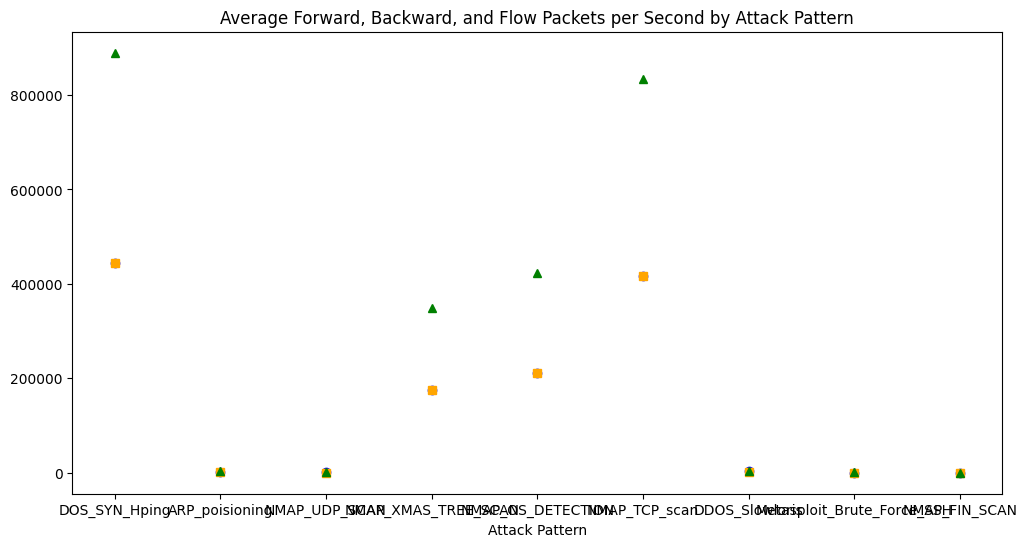

In [132]:
# forward, backward, and flow packets per second by Attack Pattern

plt.figure(figsize = (12, 6))

for attack in attack_types:
    attack_patterns = full_data[full_data['Attack_type'] == attack]
    avg_fwd_pkts = attack_patterns['fwd_pkts_per_sec'].mean()
    avg_bwd_pkts = attack_patterns['bwd_pkts_per_sec'].mean()
    avg_flow_pkts = attack_patterns['flow_pkts_per_sec'].mean()

    plt.plot([attack], [avg_fwd_pkts], label='Forward', marker='o', linestyle='-', color = 'blue')
    plt.plot([attack], [avg_bwd_pkts], label='Backward', marker='s', linestyle='-', color = 'orange')
    plt.plot([attack], [avg_flow_pkts], label='Flow', marker='^', linestyle='-', color = 'green')

plt.title('Average Forward, Backward, and Flow Packets per Second by Attack Pattern')
plt.xlabel('Attack Pattern')
#plt.legend()
plt.show()

## VAE 

## Prediction: Benign vs. Malicious

- Exclude id.orig_p, id_resp_p, ANY OTHERS?
- One-hot encode proto and service